# Credict score analysis using machine learning algorithms

Dataset description:
--------------------
This dataset provides information about address, age, experience and personal information of the people applying for the credit or loan.



Additional Details:
-----------------------
Dataset contains 9 columns and over 200000 rows.

In [1]:
##1. Data Analysis 

In [2]:
import pandas as pd

df = pd.read_csv('Training_data.csv')
df = df.drop(range(10000,200000))
df.head
df.tail()




,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [3]:
min_salary = df["Income"].min()
mean_salary = df["Income"].mean()
median_salary = df["Income"].median()
max_salary = df["Income"].max()
#printing minumum income
print("Minimun Income:",min_salary)

Minimun Income: 10310


In [4]:
#printing maximum income
print("Maximum Income:",max_salary)

Maximum Income: 9999938


In [5]:
#printing mean income
print("Mean Income:",median_salary)

Mean Income: 4990231.0


In [6]:
#printing median income
print("Median Income:",median_salary)

Median Income: 4990231.0


In [7]:
#printing correlation matrix
corr_matrix = df.corr()
print("Correlation matrix:",corr_matrix)

Correlation matrix:                          Id    Income       Age  Experience  CURRENT_JOB_YRS  \
Id                 1.000000 -0.000626 -0.004351   -0.008145        -0.005215   
Income            -0.000626  1.000000 -0.002112    0.006797         0.004270   
Age               -0.004351 -0.002112  1.000000   -0.003952        -0.002908   
Experience        -0.008145  0.006797 -0.003952    1.000000         0.658807   
CURRENT_JOB_YRS   -0.005215  0.004270 -0.002908    0.658807         1.000000   
CURRENT_HOUSE_YRS  0.004761 -0.002221 -0.006540    0.008971         0.003204   
Risk_Flag          0.037556 -0.001165 -0.000678   -0.013191        -0.001314   

                   CURRENT_HOUSE_YRS  Risk_Flag  
Id                          0.004761   0.037556  
Income                     -0.002221  -0.001165  
Age                        -0.006540  -0.000678  
Experience                  0.008971  -0.013191  
CURRENT_JOB_YRS             0.003204  -0.001314  
CURRENT_HOUSE_YRS           1.000000  -

In [8]:
#identifying column types
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [9]:
#to get the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 62000 non-null  int64 
 1   Income             62000 non-null  int64 
 2   Age                62000 non-null  int64 
 3   Experience         62000 non-null  int64 
 4   Married/Single     62000 non-null  object
 5   House_Ownership    62000 non-null  object
 6   Car_Ownership      62000 non-null  object
 7   Profession         62000 non-null  object
 8   CITY               62000 non-null  object
 9   STATE              62000 non-null  object
 10  CURRENT_JOB_YRS    62000 non-null  int64 
 11  CURRENT_HOUSE_YRS  62000 non-null  int64 
 12  Risk_Flag          62000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 6.6+ MB


## 2. Data Cleaning
----------------------------------------------------------------------------------

In [10]:
# Rename columns. "Married/Single" was renamed to "Maritial Status" 
df = df.rename(columns={"Married/Single": "Maritial Status"})

# Check column names.
df.head()

,Id,Income,Age,Experience,Maritial Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [11]:
# Check for null values.
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Maritial Status      0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [12]:
# removing unused columns from the data frame,
cols = ['STATE','Id']
df.drop(cols, axis=1, inplace=True)
df.head()


,Income,Age,Experience,Maritial Status,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],3,14,1


In [13]:
# Save columns in a list.
cols_list = list(df.columns)
# List data columns.
df.columns

Index(['Income', 'Age', 'Experience', 'Maritial Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [14]:

# Replace null values.
# Categorical variables, so use mode.

for col in cols_list:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Check for null values.
df.isnull().sum()

Income               0
Age                  0
Experience           0
Maritial Status      0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

## 3. Feature extraction

In [15]:
# Create lists of numerical and categorcal columns.

number_cols = df._get_numeric_data().columns
categorial_cols = list(set(cols_list) - set(number_cols))

In [16]:
# Create numerical and categorcal datasets.
numerical_data = df[number_cols]
category_data = df[categorial_cols]

In [17]:
# Checking new dataframes.
print(numerical_data.shape)
print(category_data.shape)

(62000, 6)
(62000, 5)


In [18]:
# Encode categorical data - convert to numerical.
from sklearn import preprocessing
for feature in categorial_cols:
  le = preprocessing.LabelEncoder()
  df[feature] = le.fit_transform(df[feature])

In [19]:
# Check dtypes.
df.dtypes

Income               int64
Age                  int64
Experience           int64
Maritial Status      int64
House_Ownership      int64
Car_Ownership        int64
Profession           int64
CITY                 int64
CURRENT_JOB_YRS      int64
CURRENT_HOUSE_YRS    int64
Risk_Flag            int64
dtype: object

## 4. Exploratory Data Analysis and Visualisation
----------------------------------------------------------------------------------

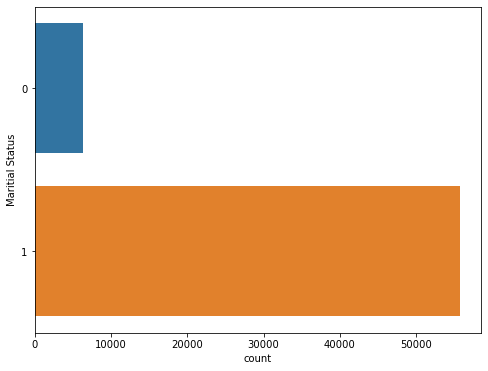

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

#visualising 0 values in age column 
age = df.loc[df['Age'] != 0]
plt.figure(figsize=(8,6))
sns.countplot(y='Maritial Status', data= age)
plt.show()

In [21]:
df['Experience'].describe()

count    62000.000000
mean        10.020452
std          6.027936
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         20.000000
Name: Experience, dtype: float64

(array([5795., 5781., 5941., 5982., 5978., 5880., 6004., 5887., 5897.,
        8855.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

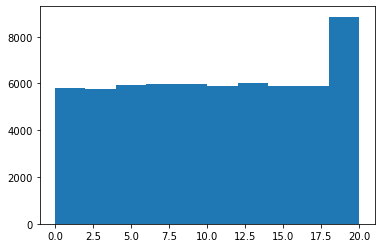

In [22]:
# Experience histogram plot.
plt.hist(df['Experience'])


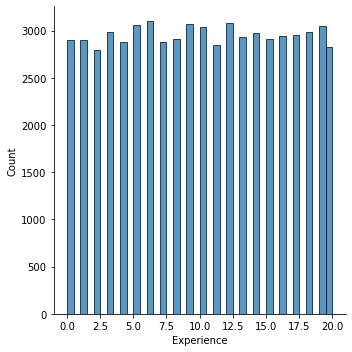

In [23]:
# Experience distribution plot.
sns.displot(age, x="Experience")

/Users/abdbastola/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


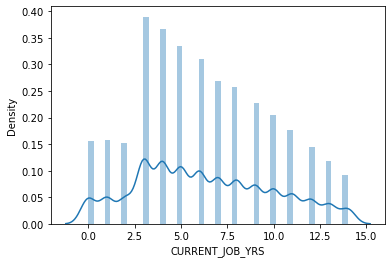

In [24]:
# Current job years enhanced distribution plot.
sns.distplot(df['CURRENT_JOB_YRS'])
plt.show()

In [25]:
# Income summary.
df['Income'].describe()

count    6.200000e+04
mean     4.997406e+06
std      2.881277e+06
min      1.031000e+04
25%      2.504534e+06
50%      4.990231e+06
75%      7.488205e+06
max      9.999938e+06
Name: Income, dtype: float64

<AxesSubplot:ylabel='Density'>

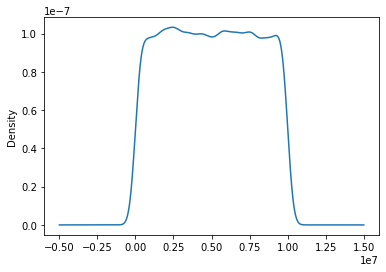

In [26]:
# Density plot of Income.
df['Income'].plot(kind='density')

<AxesSubplot:>

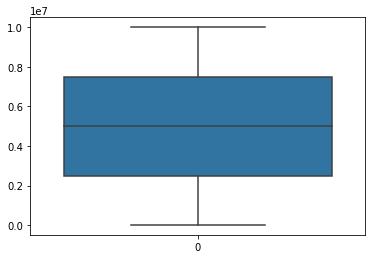

In [27]:
# boxplot for analysisng outliers if any 
sns.boxplot(data=df['Income'])

<AxesSubplot:xlabel='Maritial Status', ylabel='Age'>

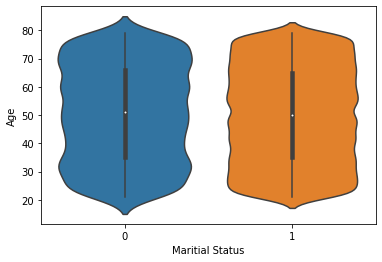

In [28]:
# Violin plot of experience and marital status.
sns.violinplot(x=df['Maritial Status'],y=df['Age'],data=df)

In [29]:
# Creating new age group column.
df["Age Group"]=pd.cut(df['Age'], [29,40,50,60,70,80])

<AxesSubplot:xlabel='Age Group', ylabel='Income'>

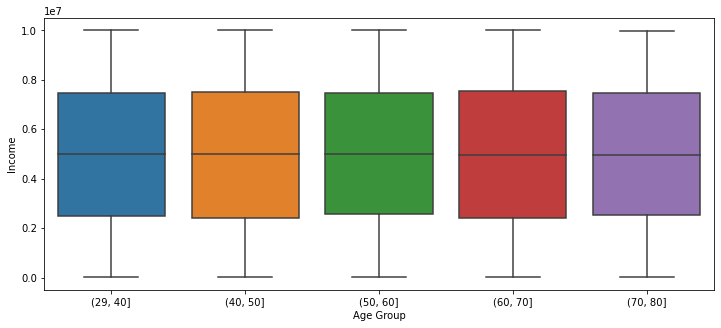

In [30]:
# Plotting income against age group.
plt.figure(figsize=(12,5))
sns.boxplot(x = "Age Group", y = "Income", data=df)

<AxesSubplot:xlabel='Age Group', ylabel='Income'>

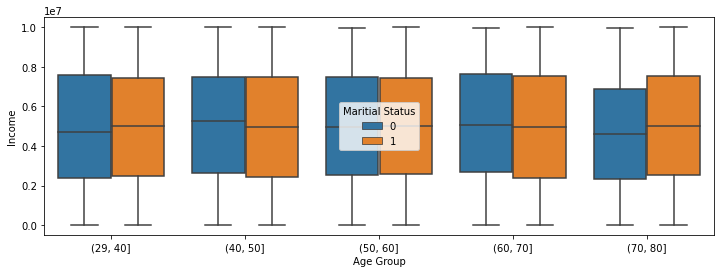

In [31]:
# Plotting income against age group according to maritial status.
plt.figure(figsize=(12, 4))
sns.boxplot(x = "Age Group", y = "Income", hue = "Maritial Status", data=df)


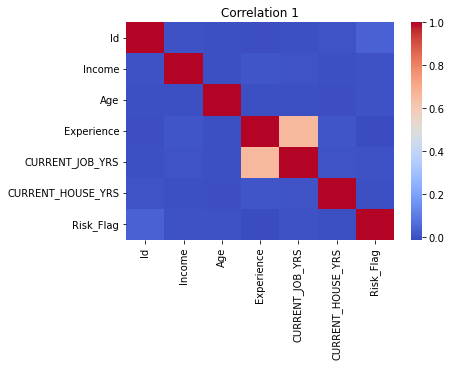

In [32]:
# Correlation matrix between numerical values.
g = sns.heatmap(corr_matrix, cmap = "coolwarm")  # annot=True,
plt.title('Correlation 1')
plt.show()

/var/folders/d9/5jz14gtj12l6vlc97hgmj_kr0000gn/T/ipykernel_1630/2423396719.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

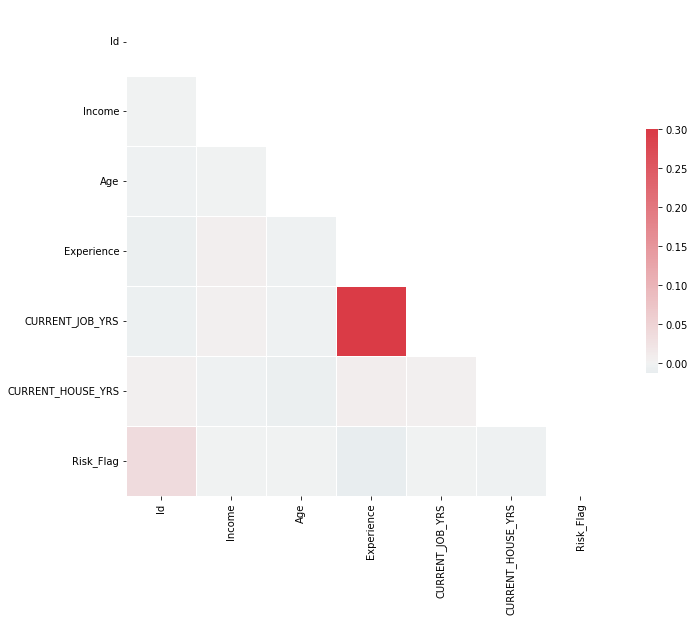

In [33]:
# Plot and save correlation using a second method.
import numpy as np
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
    linewidths=.5, cbar_kws={"shrink": .5})

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Experience', ylabel='Income'>,
        <AxesSubplot:xlabel='Age', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='Experience'>,
        <AxesSubplot:xlabel='Experience', ylabel='Experience'>,
        <AxesSubplot:xlabel='Age', ylabel='Experience'>],
       [<AxesSubplot:xlabel='Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Experience', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

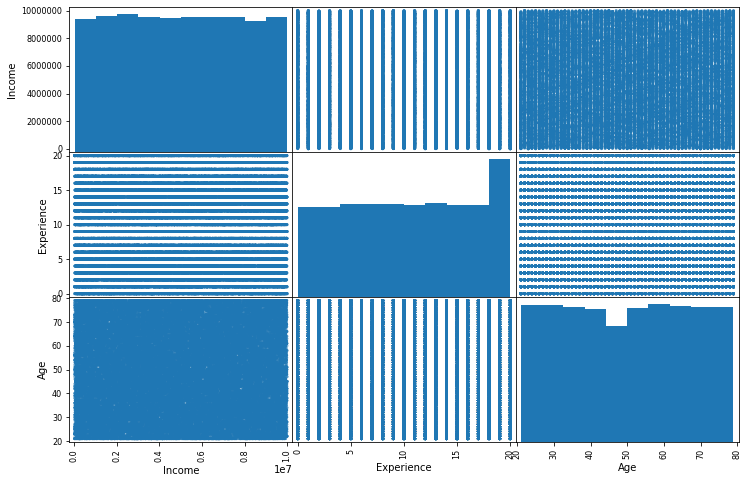

In [34]:
# Scatter Plot
from pandas.plotting import scatter_matrix
attributes = ['Income','Experience','Age']
scatter_matrix(df[attributes], figsize=(12, 8))

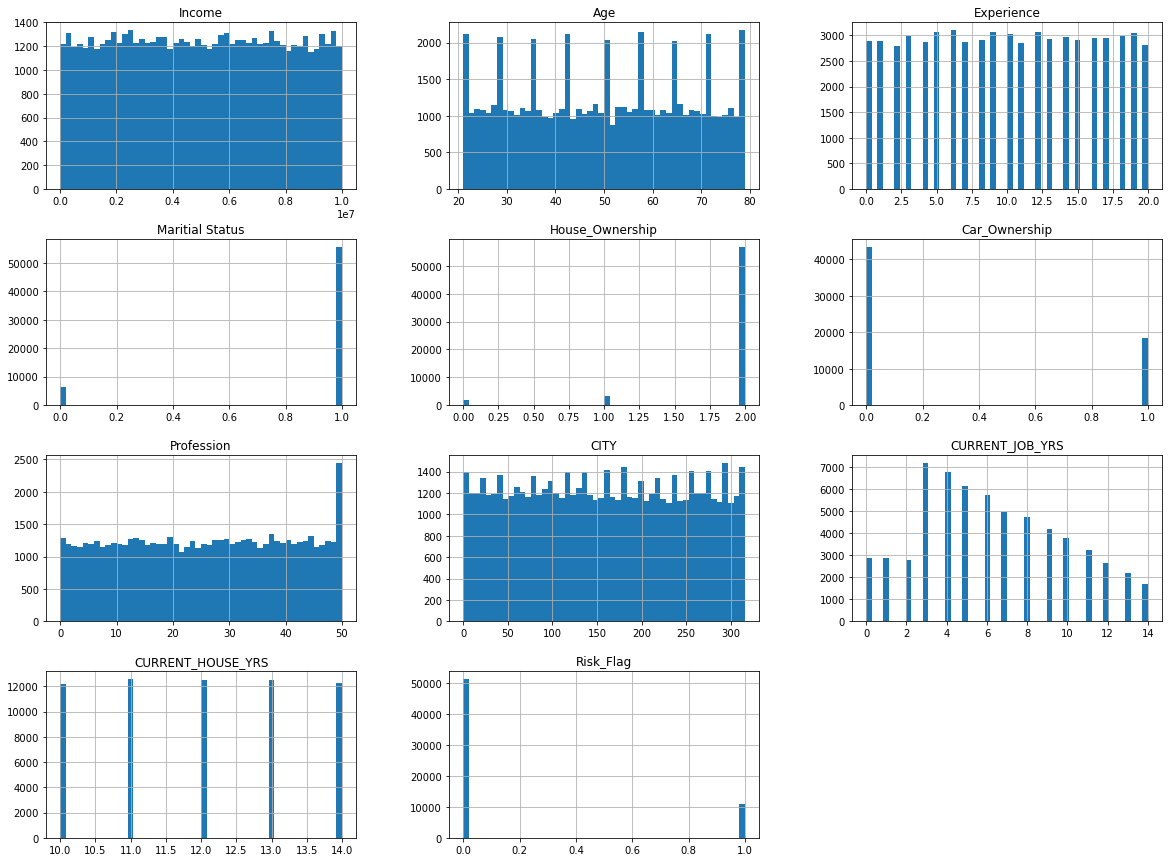

In [35]:
get_ipython().run_line_magic('matplotlib', 'inline')

df.hist(bins=50, figsize=(20,15))
plt.show()

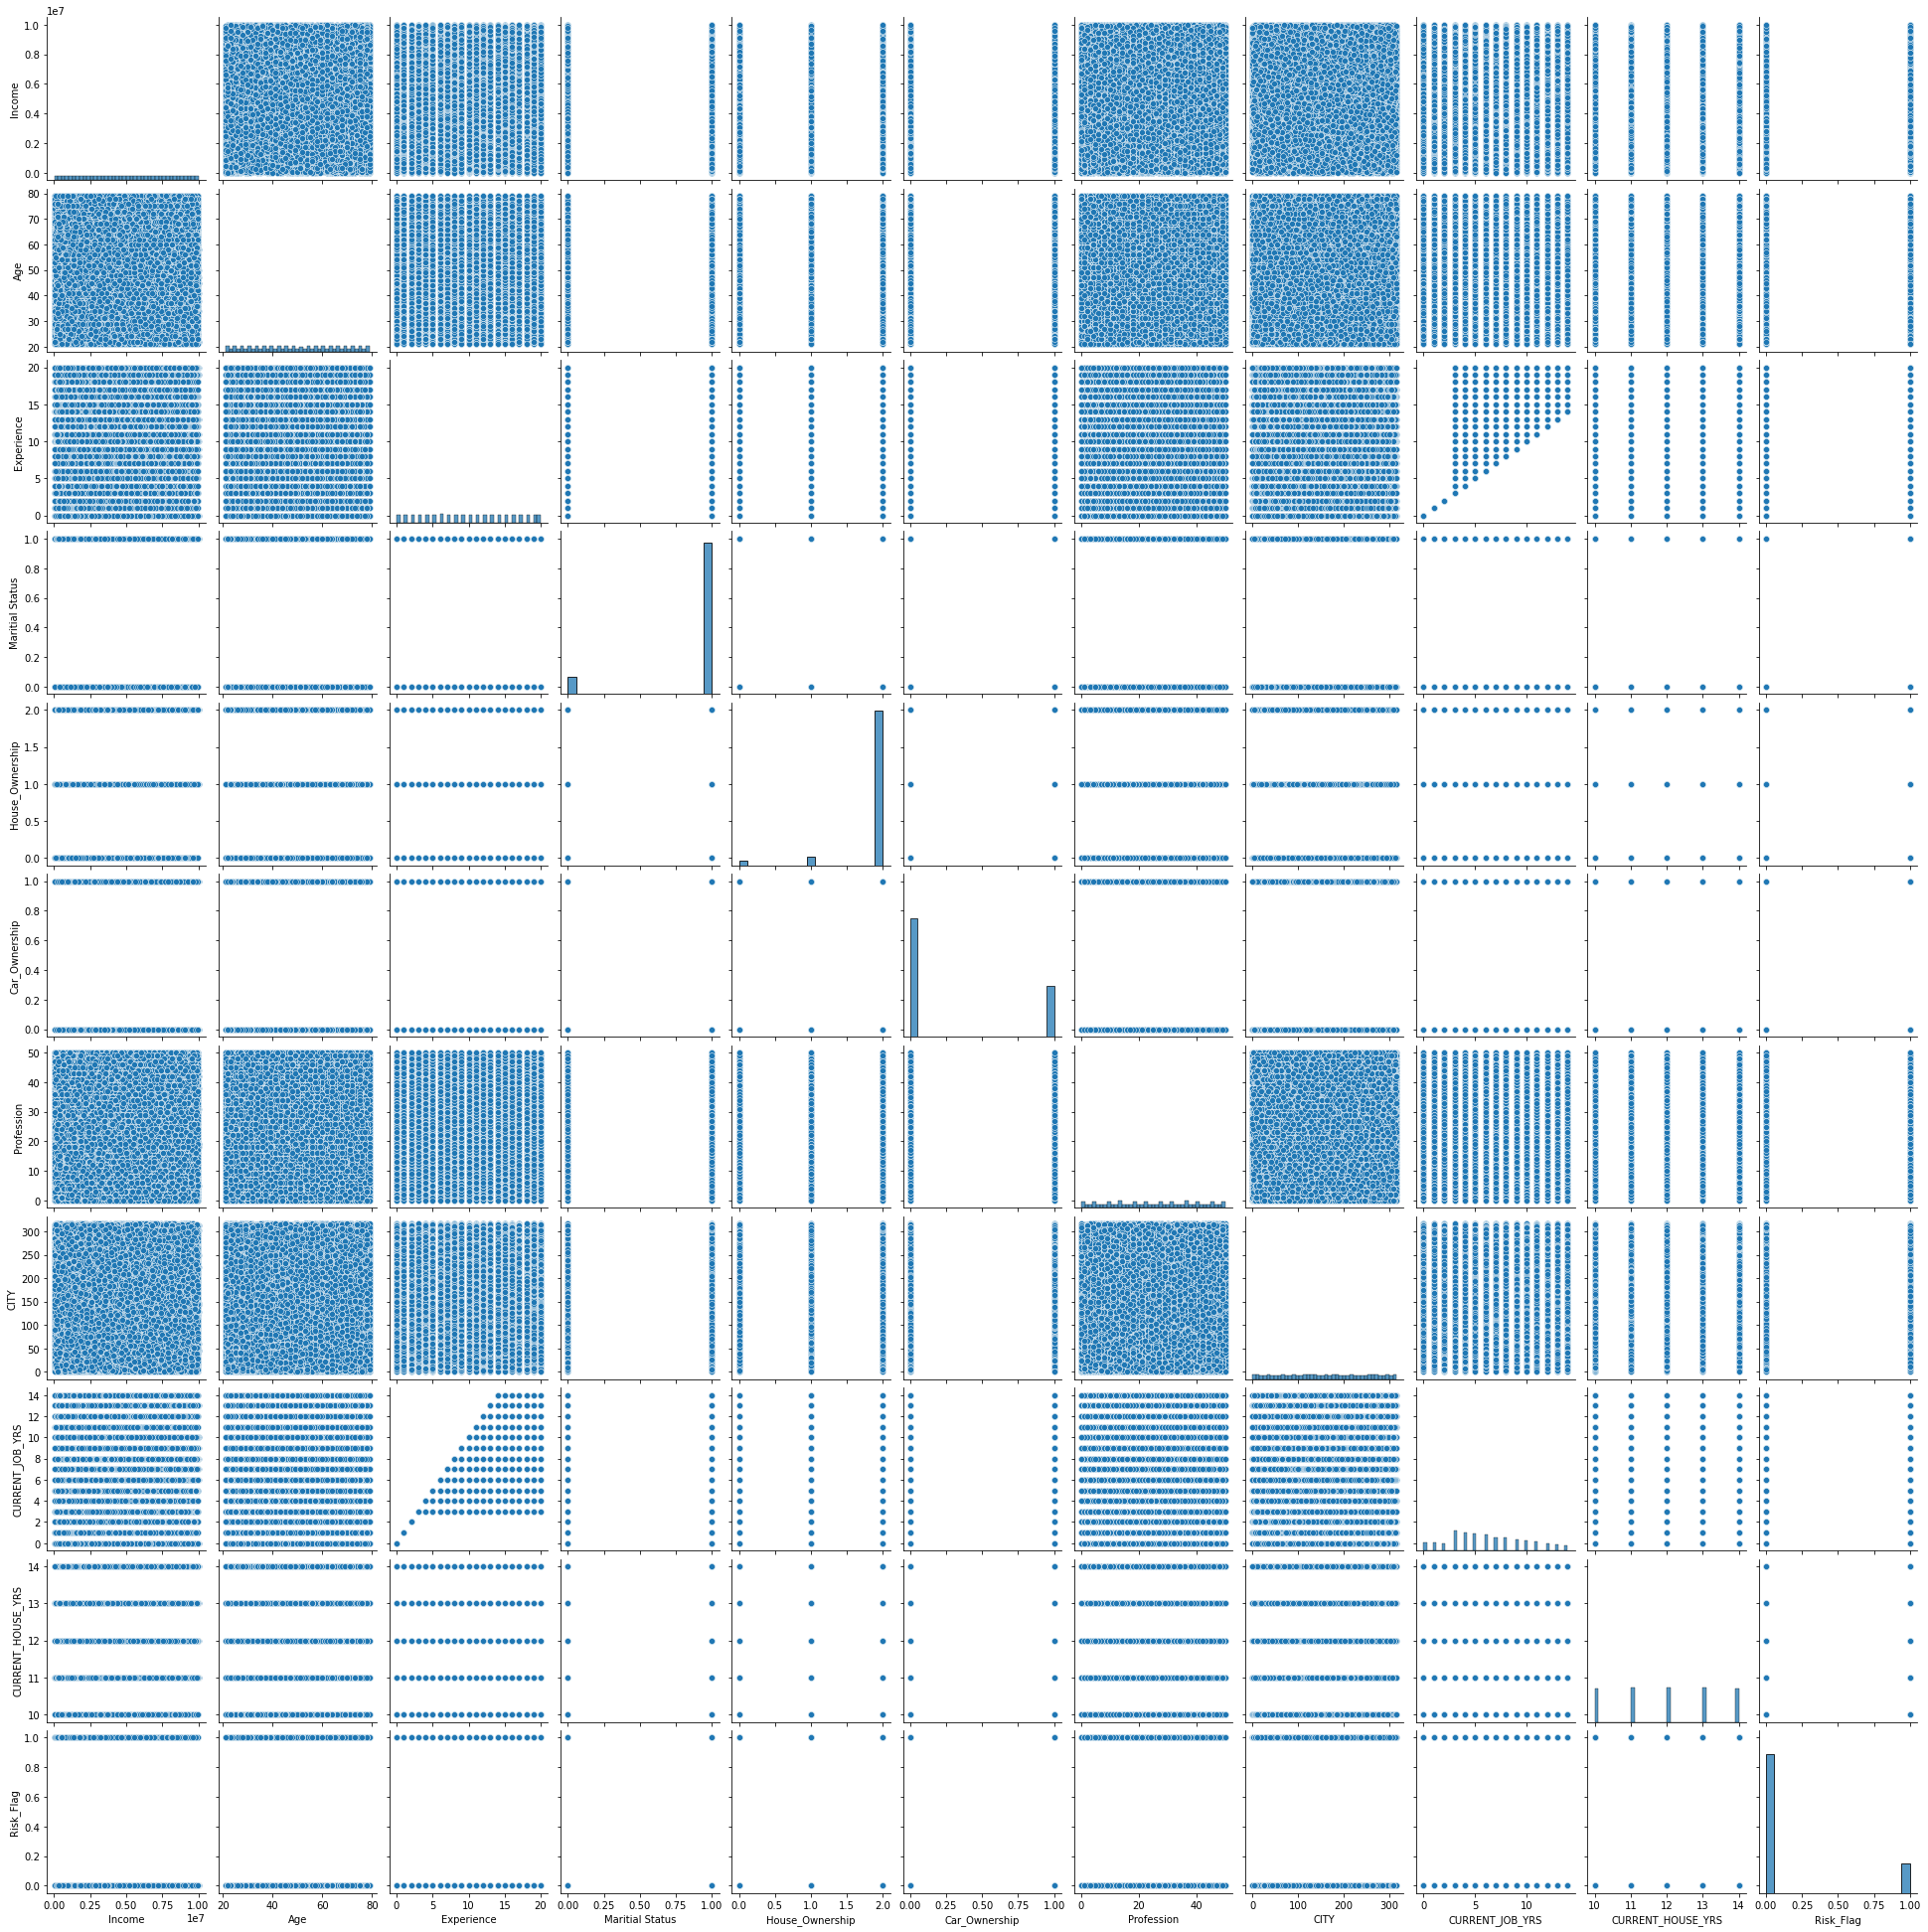

In [36]:
# Pair Plot
sns.pairplot(df)

## 5. Scaling Data

In [37]:
#scaling the data in dataset to normalise
from sklearn.preprocessing import StandardScaler


# removing age group column as it not fit,
cols = ['Age Group']
df.drop(cols, axis=1, inplace=True)
df.head()
scaled_data = df
scaled_data.info()

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data), columns=scaled_data.columns)
scaled_data.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 62000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             62000 non-null  int64
 1   Age                62000 non-null  int64
 2   Experience         62000 non-null  int64
 3   Maritial Status    62000 non-null  int64
 4   House_Ownership    62000 non-null  int64
 5   Car_Ownership      62000 non-null  int64
 6   Profession         62000 non-null  int64
 7   CITY               62000 non-null  int64
 8   CURRENT_JOB_YRS    62000 non-null  int64
 9   CURRENT_HOUSE_YRS  62000 non-null  int64
 10  Risk_Flag          62000 non-null  int64
dtypes: int64(11)
memory usage: 7.7 MB


,Income,Age,Experience,Maritial Status,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,-1.281932,-1.580862,-1.164662,0.336283,0.279139,-0.651739,0.535691,1.014627,-0.904455,0.708034,-0.460386
1,0.894440,-0.583717,-0.003393,0.336283,0.279139,-0.651739,1.214881,0.752942,0.734904,0.708034,-0.460386
2,-0.349012,0.941327,-0.998767,-2.973690,0.279139,-0.651739,1.486557,-1.634939,-0.631228,-1.423702,-0.460386
3,0.436978,-0.525062,-1.330558,0.336283,0.279139,1.534357,1.214881,-1.133375,-1.177681,-0.002544,2.172090
4,0.267753,-0.173128,0.162503,0.336283,0.279139,-0.651739,-0.958526,1.505288,-0.904455,1.418613,2.172090


In [38]:
#Scaling the data according to the risk flag
target = pd.DataFrame(scaled_data['Risk_Flag'])
labels = pd.DataFrame(scaled_data.drop('Risk_Flag', axis=1 ))

display(labels.head(),target.head())

,Income,Age,Experience,Maritial Status,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.281932,-1.580862,-1.164662,0.336283,0.279139,-0.651739,0.535691,1.014627,-0.904455,0.708034
1,0.894440,-0.583717,-0.003393,0.336283,0.279139,-0.651739,1.214881,0.752942,0.734904,0.708034
2,-0.349012,0.941327,-0.998767,-2.973690,0.279139,-0.651739,1.486557,-1.634939,-0.631228,-1.423702
3,0.436978,-0.525062,-1.330558,0.336283,0.279139,1.534357,1.214881,-1.133375,-1.177681,-0.002544
4,0.267753,-0.173128,0.162503,0.336283,0.279139,-0.651739,-0.958526,1.505288,-0.904455,1.418613


,Risk_Flag
0,-0.460386
1,-0.460386
2,-0.460386
3,2.172090
4,2.172090


## 6. PCA(Principal Component Analysis)

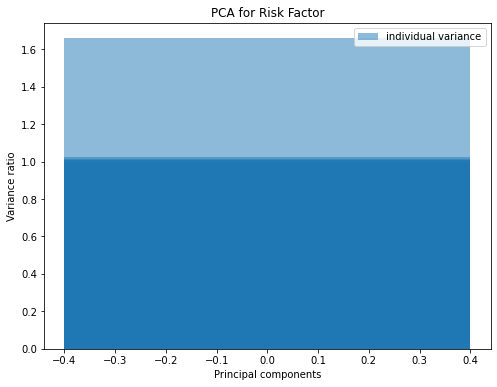

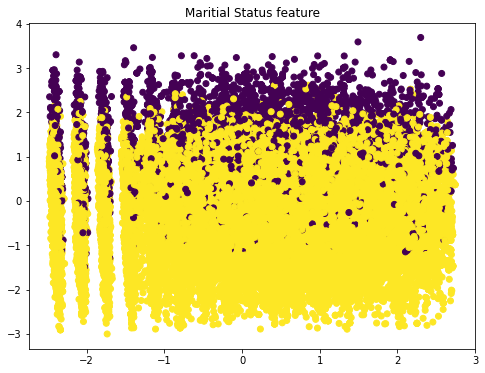

In [39]:
# performing PCA on the dataset - simplifying the data dimentionality but retians the trend and patterns

from sklearn.decomposition import PCA

pca = PCA(0.80)
pca.fit(labels)

data = pca.transform(labels)
# Extract variance.
pca_variance = pca.explained_variance_
    
# Visualise PCA.
plt.figure(figsize=(8, 6))
plt.bar(range(target.shape[1]), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.title('PCA for Risk Factor')
plt.show()

 # Visalise PCA for Gender feature.
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,5], c=df['Maritial Status'])
plt.title('Maritial Status feature')
plt.show()

In [40]:
# view shape of thefeatures and labels
display(data.shape,labels.shape)

(62000, 8)

(62000, 10)

## 7. Machine Learning Algorithms- Logistics Regression

In [41]:
from sklearn import model_selection

# Set metrics.
validation_size = 0.20
seed = 42
num_folds = 10
scoring = 'accuracy'

Logistic Regression accuracy for Risk_Flag: 0.8240
Logistic Regression F1 score for Risk_Flag: 0.4518
Logistic Regression accuracy for Age: 0.0936
Logistic Regression F1 score for Age: 0.0730


/Users/abdbastola/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy for Experience: 0.3945
Logistic Regression F1 score for Experience: 0.3744


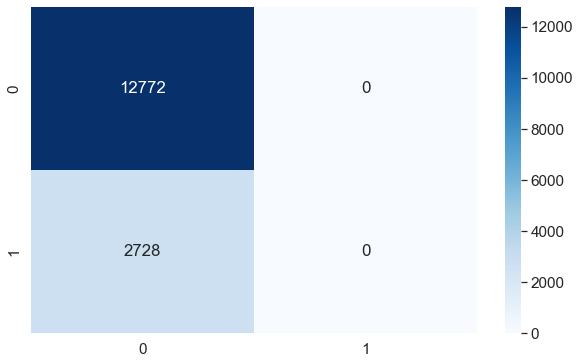

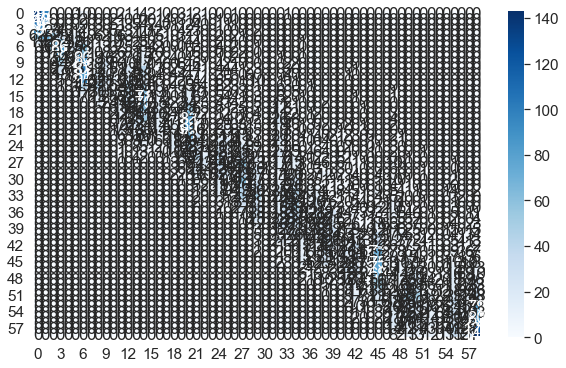

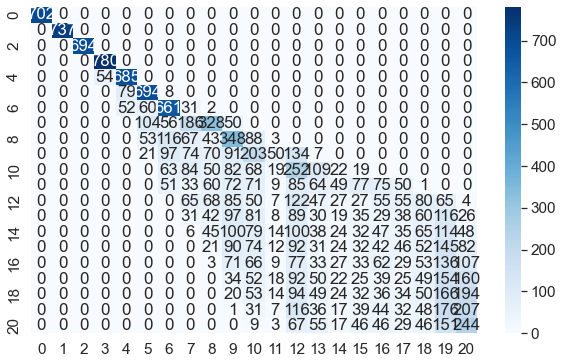

In [42]:
# Create Logistic regression function.
def log_reg(feature='Risk_Flag'):
    # Set feature as Y and drop from X.
    X = df.drop([feature], axis=1)
    Y = df[feature]


    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(data, Y, test_size= 0.25, random_state=0)  
    
    from sklearn.linear_model import LogisticRegression  
    classifier= LogisticRegression(random_state=0)  
    classifier.fit(x_train, y_train)
    #Predicting the test set result  
    y_pred= classifier.predict(x_test)  
    # Obtain accuracy and F1 score of model by comparing actual values to predicted.
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
    y_accuracy = accuracy_score(y_test, y_pred)
    y_f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print accuracy and F1 score.
    print('Logistic Regression accuracy for ' + str(feature) +': {0:0.4f}'. format(y_accuracy))
    print('Logistic Regression F1 score for ' + str(feature) +': {0:0.4f}'. format(y_f1))
    #Confusion Matix and heat map to show the matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1.4)
    sns.heatmap(cf_matrix,annot=True,fmt='g',cmap='Blues')
log_reg()
log_reg('Age')
log_reg('Experience')

## 8. Machine Learning Algorithms- Decision tree and random forest

Decision Tree Classifier accuracy for Risk_Flag: 0.77
Decision Tree Classifier F1 for Risk_Flag:: 0.60

Decision Tree Classifier accuracy for Age: 0.47
Decision Tree Classifier F1 for Age:: 0.47

Decision Tree Classifier accuracy for Experience: 0.76
Decision Tree Classifier F1 for Experience:: 0.76



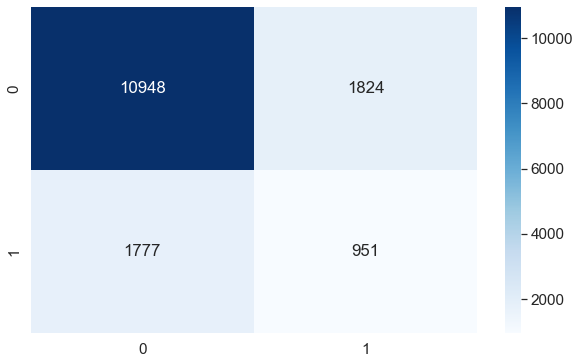

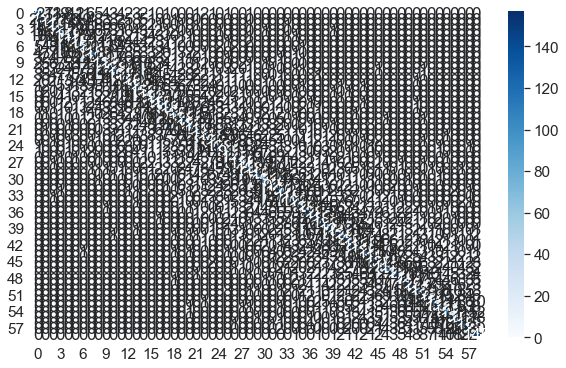

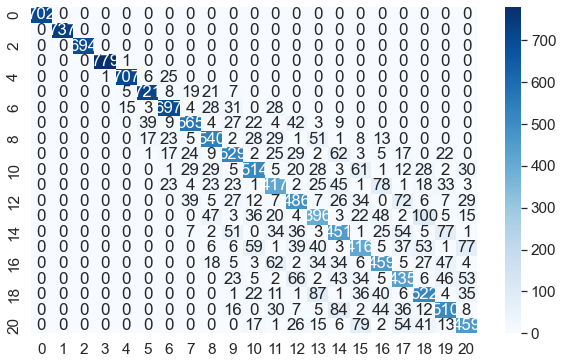

In [43]:
# Create Decision tree and random forest function.
def dec_tree(feature='Risk_Flag'):
    # Set feature as Y and drop from X.
    X = df.drop([feature], axis=1)
    Y = df[feature]
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(data, Y, test_size= 0.25, random_state=0)  
   
    # Decision tree classifier.
    from sklearn import tree
    from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
    dec_model = DecisionTreeClassifier().fit(x_train, y_train)
    dec_pred = dec_model.predict(x_test)
    
    # Accuracy and F1 score
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
    dec_acc = accuracy_score(y_test, dec_pred)
    dec_f1 = f1_score(y_test, dec_pred, average='macro')
    print("Decision Tree Classifier accuracy for " + str(feature) +": %.2f" %dec_acc)
    print("Decision Tree Classifier F1 for " + str(feature) +":: %.2f" %dec_f1)
    print("")
    #Confusion Matix and heat map to show the matrix
    cf_matrix = confusion_matrix(y_test, dec_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1.4)
    sns.heatmap(cf_matrix,annot=True,fmt='g',cmap='Blues')
dec_tree()
dec_tree('Age')
dec_tree('Experience')

Random Forest Classifier accuracy for Risk_Flag:: 0.85
Random Forest Classifier F1 for Risk_Flag: 0.62

Random Forest Classifier accuracy for Age:: 0.49
Random Forest Classifier F1 for Age: 0.49

Random Forest Classifier accuracy for Experience:: 0.74
Random Forest Classifier F1 for Experience: 0.73



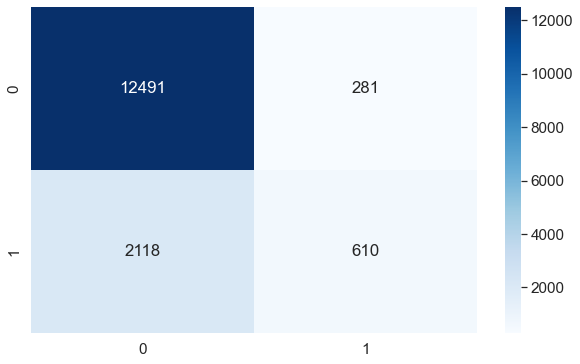

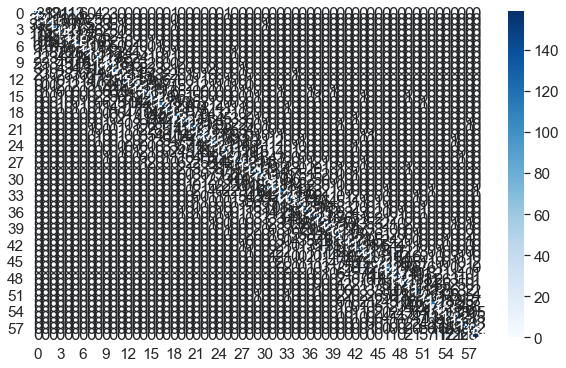

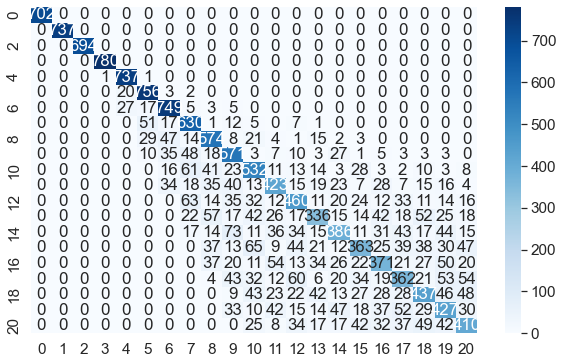

In [44]:
def rand_theme(feature='Risk_Flag'):
    # Set feature as Y and drop from X.
    X = df.drop([feature], axis=1)
    Y = df[feature]
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(data, Y, test_size= 0.25, random_state=0)  
   
    # Random forest classifier.
    from sklearn.ensemble import RandomForestClassifier
    rand_model = RandomForestClassifier(random_state=1).fit(x_train, y_train)
    rand_pred = rand_model.predict(x_test)
    
    # Accuracy and F1 score
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
    rand_acc = accuracy_score(y_test, rand_pred)
    rand_f1 = f1_score(y_test, rand_pred, average='macro')
    print("Random Forest Classifier accuracy for "+ str(feature) +":: %.2f" %rand_acc)
    print("Random Forest Classifier F1 for "+ str(feature) +": %.2f" %rand_f1)
    print("")
    #Confusion Matix and heat map to show the matrix
    cf_matrix = confusion_matrix(y_test, rand_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1.4)
    sns.heatmap(cf_matrix,annot=True,fmt='g',cmap='Blues')
    
rand_theme()
rand_theme('Age')
rand_theme('Experience')

## 9. Machine Learning Algorithms- Support Vector Machine

SVC accuracy for Risk_Flag: 0.82
SVC F1 score for Risk_Flag: 0.45
SVC accuracy for Age: 0.21
SVC F1 score for Age: 0.17
SVC accuracy for Experience: 0.46
SVC F1 score for Experience: 0.41


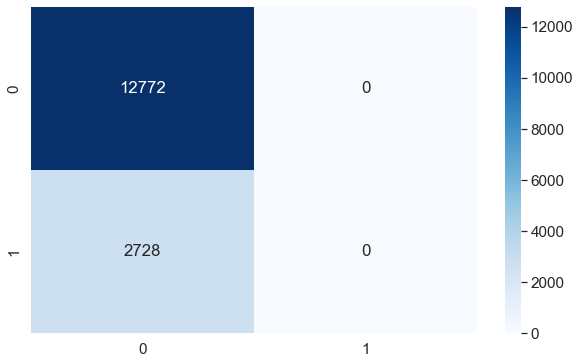

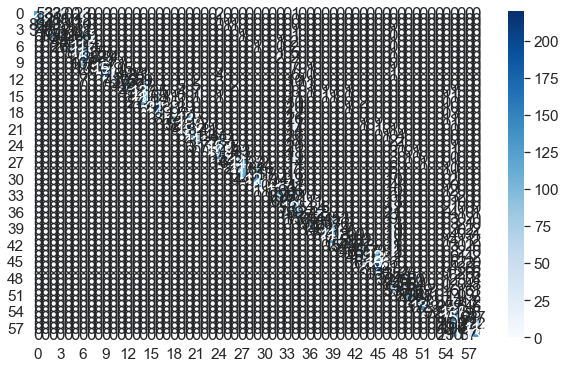

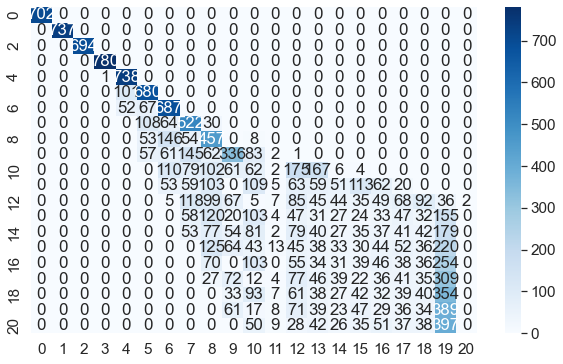

In [45]:
#function for creating support vector machine
def sup_vec(feature='Risk_Flag'):
    # Set feature as Y and drop from X.
    X = df.drop([feature], axis=1)
    Y = df[feature]
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(data, Y, test_size= 0.25, random_state=0)  
   
    # Support Vector Machine Classifier
    from sklearn.svm import SVC
    svc = SVC(kernel = 'linear')
    svc_model = svc.fit(x_train, y_train)
    svc_pred = svc_model.predict(x_test)
    # Accuracy and F1 score
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
    svc_acc = accuracy_score(y_test, svc_pred)
    svc_f1 = f1_score(y_test, svc_pred, average='macro')
    print('SVC accuracy for '+ str(feature) +': %.2f' %svc_acc)
    print('SVC F1 score for '+ str(feature) +': %.2f' %svc_f1)
    #Confusion Matix and heat map to show the matrix
    cf_matrix = confusion_matrix(y_test, svc_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1.4)
    sns.heatmap(cf_matrix,annot=True,fmt='g',cmap='Blues')
    
sup_vec()
sup_vec('Age')
sup_vec('Experience')

## 10. Machine Learning Algorithms- Deep Learning (MultiLayer Perceptions)

In [46]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


/Users/abdbastola/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP accuracy for: Risk_Flag: 0.82
MLP F1 score for: Risk_Flag: 0.45


/Users/abdbastola/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP accuracy for: Age: 0.60
MLP F1 score for: Age: 0.60


/Users/abdbastola/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP accuracy for: Experience: 0.48
MLP F1 score for: Experience: 0.45


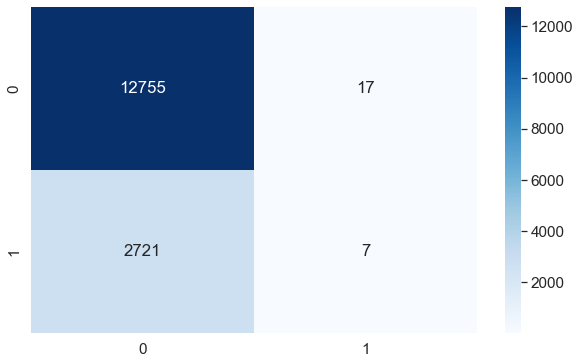

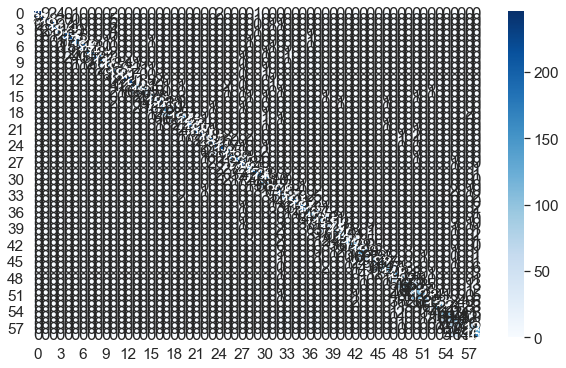

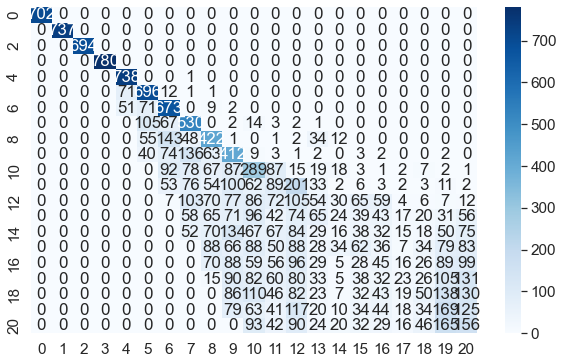

In [47]:
#function to create MLP classifier
def mlp(feature='Risk_Flag'):
    # importing mglearn library
    import mglearn
    from sklearn.neural_network import MLPClassifier
     # Set feature as Y and drop from X.
    X = df.drop([feature], axis=1)
    Y = df[feature]
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(data, Y, test_size= 0.25, random_state=0)
    mlp_model = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)
    mlp_pred = mlp_model.predict(x_test)
    # Accuracy and F1 score
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
    mlp_acc = accuracy_score(y_test, mlp_pred)
    mlp_f1 = f1_score(y_test, mlp_pred, average='macro')
    print('MLP accuracy for: '+ str(feature) +': %.2f' %mlp_acc)
    print('MLP F1 score for: '+ str(feature) +': %.2f' %mlp_f1)
    #Confusion Matix and heat map to show the matrix
    cf_matrix = confusion_matrix(y_test, mlp_pred)
    plt.figure(figsize=(10,6))
    sns.set(font_scale=1.4)
    sns.heatmap(cf_matrix,annot=True,fmt='g',cmap='Blues')
    
mlp()
mlp('Age')
mlp('Experience')
   

--- Risk_Flag ---
   
Table of accuracy results for Risk_Flag
                  algorithm  accuracy  F1 score
0       Logistic regression  0.824000  0.451754
0  Decision Tree Classifier  0.766581  0.599693
0  Random Forest Classifier  0.845226  0.624747
0            SVM Classifier  0.824000  0.451754
   


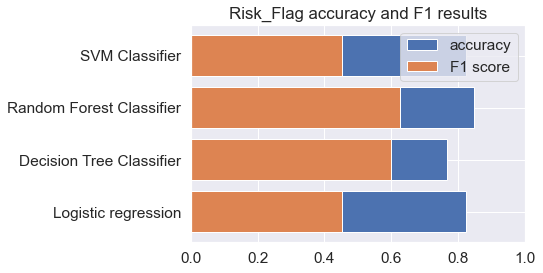

--- Age ---
   
Table of accuracy results for Age
                  algorithm  accuracy  F1 score
0       Logistic regression  0.093613  0.072998
0  Decision Tree Classifier  0.472903  0.471771
0  Random Forest Classifier  0.491613  0.490362
0            SVM Classifier  0.206581  0.169852
   


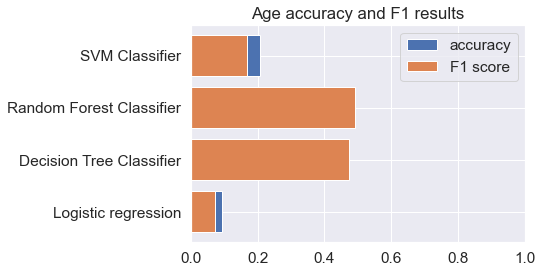

--- Experience ---


/Users/abdbastola/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   
Table of accuracy results for Experience
                  algorithm  accuracy  F1 score
0       Logistic regression  0.394516  0.374365
0  Decision Tree Classifier  0.758065  0.756981
0  Random Forest Classifier  0.737871  0.731419
0            SVM Classifier  0.457355  0.414584
   


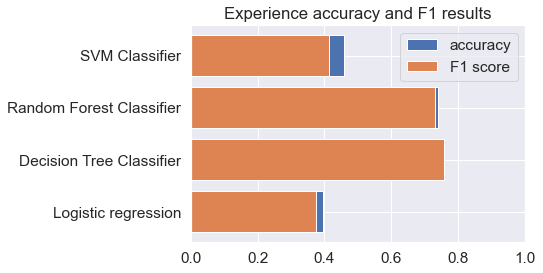

In [48]:
#function to compare different algorithm
def compare_algorithm(feature='Risk_Flag'):
     # Declare global variables to access dataframe outside of function.
    global new_data, comp
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
    # Initialise new dataframe to save results.
    comp = pd.DataFrame()
    # Print spaces to visually improve results.
    print("--- "+ feature + " ---")
    # Set feature as Y and drop from X.
    X = df.drop([feature], axis=1)
    Y = df[feature]


    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(data, Y, test_size= 0.25, random_state=0)  
    
    
    #Logistics Regression
    from sklearn.linear_model import LogisticRegression  
    classifier= LogisticRegression(random_state=0)  
    classifier.fit(x_train, y_train)
    #Predicting the test set result  
    y_pred= classifier.predict(x_test)  
    # Obtain accuracy and F1 score of model by comparing actual values to predicted.
    
    y_accuracy = accuracy_score(y_test, y_pred)
    y_f1 = f1_score(y_test, y_pred, average='macro')
    new_data = [["Logistic regression", y_accuracy, y_f1]]
    comp = comp.append(new_data)
    
    # Decision tree classifier.
    from sklearn import tree
    from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
    dec_model = DecisionTreeClassifier().fit(x_train, y_train)
    dec_pred = dec_model.predict(x_test)

    # Accuracy and F1 score
    dec_acc = accuracy_score(y_test, dec_pred)
    dec_f1 = f1_score(y_test, dec_pred, average='macro')
    new_data = [["Decision Tree Classifier", dec_acc, dec_f1]]
    comp = comp.append(new_data)
    
    # Random forest classifier.
    from sklearn.ensemble import RandomForestClassifier
    rand_model = RandomForestClassifier(random_state=1).fit(x_train, y_train)
    rand_pred = rand_model.predict(x_test)
    
    # Accuracy and F1 score
    rand_acc = accuracy_score(y_test, rand_pred)
    rand_f1 = f1_score(y_test, rand_pred, average='macro')
    new_data = [["Random Forest Classifier", rand_acc, rand_f1]]
    comp = comp.append(new_data)
    
    # Support Vector Machine Classifier
    from sklearn.svm import SVC
    svc = SVC(kernel = 'linear')
    svc_model = svc.fit(x_train, y_train)
    svc_pred = svc_model.predict(x_test)
    # Accuracy and F1 score
    svc_acc = accuracy_score(y_test, svc_pred)
    svc_f1 = f1_score(y_test, svc_pred, average='macro')
    new_data = [["SVM Classifier", svc_acc, svc_f1]]
    comp = comp.append(new_data)
    # Rename columns.
    comp.columns = ["algorithm", "accuracy", "F1 score"]
    print("   ")
    # Display table of results.
    print("Table of accuracy results for " + feature)
    print(comp.head())
    print("   ")
   
    # Display barplot of accuracy and F1 results.
    plt.barh(comp["algorithm"], comp["accuracy"], label='accuracy')
    plt.barh(comp["algorithm"], comp["F1 score"], label='F1 score')
    plt.title(feature + " accuracy and F1 results")
    plt.xlim([0, 1])
    plt.legend()
    plt.show()
    
compare_algorithm()
compare_algorithm('Age')
compare_algorithm('Experience')
